In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [109]:
import seaborn as sns

In [110]:
import os

In [111]:
uk_visits = pd.read_csv("data/UK_international-visits.csv")
uk_visits.loc[uk_visits['year']=='2019P','year'] = '2019'
uk_visits['year'] = uk_visits['year'].map(int)
uk_visits['quarter'] = uk_visits['quarter'].map({"January-March":0,"April-June":1,"July-September":2,"October-December":3})
uk_visits = uk_visits[uk_visits['year']<2019]
uk_visits.head()

,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
0,2002,0,Belgium,1-3 nights,Air,Holiday,TOTAL ENGLAND,4.431616,1.013484,9.530416,6
1,2002,0,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
2,2002,0,Belgium,1-3 nights,Air,Holiday,REST OF ENGLAND,0.859430,0.044346,2.575960,1
3,2002,0,Belgium,1-3 nights,Air,Holiday,SOUTHERN ENGLAND,0.859430,0.044346,2.575960,1
4,2002,0,Belgium,1-3 nights,Air,Holiday,SOUTH EAST,0.859430,0.044346,2.575960,1


In [112]:
len(uk_visits)

529818

In [113]:
uk_visits['market'].value_counts().head()

France         29767
Germany        28329
USA            25358
Netherlands    23054
Australia      19268
Name: market, dtype: int64

In [114]:
len(uk_visits['year'].unique())

17

In [115]:
uk_visits_adjusted = pd.DataFrame()

uk_visits_adjusted = uk_visits_adjusted.append(uk_visits[(uk_visits['area']=='LONDON')].reset_index(drop=True))

uk_visits_adjusted = uk_visits_adjusted.append(uk_visits[(uk_visits['area']=='REST OF ENGLAND')].reset_index(drop=True))

uk_visits_adjusted = uk_visits_adjusted.append(uk_visits[(uk_visits['area']=='TOTAL ENGLAND')].reset_index(drop=True))

temp = uk_visits[uk_visits["area"].isin([' NORTHERN IRELAND','SCOTLAND','WALES',' CHANNEL ISLANDS', ' ISLE OF MAN',' OIL RIGS/TRAVELLING'])]\
                 .groupby(['year','quarter','market','dur_stay','mode','purpose']).sum().reset_index()

temp['area'] = 'REST OF UK'
temp = temp.reindex(columns = uk_visits_adjusted.columns)

uk_visits_adjusted = uk_visits_adjusted.append(temp)

uk_visits_adjusted = uk_visits_adjusted.append(uk_visits[(uk_visits['area']=='ALL STAYING VISITS')].reset_index(drop=True))

uk_visits_adjusted.head()

,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
0,2002,0,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,0,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,0,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,0,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,0,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1


In [116]:
uk_visits2 = uk_visits_adjusted.groupby(['year','quarter','dur_stay','purpose','area'])['visits','spend','nights'].agg('sum').reset_index()
uk_visits2.head()

,year,quarter,dur_stay,purpose,area,visits,spend,nights
0,2002,0,1-3 nights,Business,ALL STAYING VISITS,982.006073,297.266799,1709.295949
1,2002,0,1-3 nights,Business,LONDON,428.733916,186.331661,756.584380
2,2002,0,1-3 nights,Business,REST OF ENGLAND,534.568070,98.785969,868.673330
3,2002,0,1-3 nights,Business,REST OF UK,61.825858,12.149167,84.038054
4,2002,0,1-3 nights,Business,TOTAL ENGLAND,934.361789,285.117634,1625.257709


In [117]:
uk_visits3 = uk_visits2[uk_visits2['purpose']!="Business"].groupby(['year','area'])['visits','spend','nights'].agg('sum').reset_index()

uk_visits3.head()

,year,area,visits,spend,nights
0,2002,ALL STAYING VISITS,16347.050079,8005.668402,170352.887693
1,2002,LONDON,8812.334528,3922.891257,63282.771586
2,2002,REST OF ENGLAND,7552.434018,3114.535563,85546.109648
3,2002,REST OF UK,2398.013539,966.702889,21494.893722
4,2002,TOTAL ENGLAND,14963.586459,7037.426768,148828.877928


In [118]:
# uk_visits3[uk_visits3['area'] == 'TOTAL ENGLAND'].reset_index(drop=True).iloc[:,2:]/uk_visits3[uk_visits3['area'] == 'ALL STAYING VISITS'].reset_index(drop=True).iloc[:,2:]


In [119]:
# uk_visits3[uk_visits3['area'] == 'LONDON'].reset_index(drop=True).iloc[:,2:]/uk_visits3[uk_visits3['area'] == 'TOTAL ENGLAND'].reset_index(drop=True).iloc[:,2:]

uk_visits3[uk_visits3['area'] == 'TOTAL ENGLAND'].reset_index(drop=True).iloc[:,2:]/uk_visits3[uk_visits3['area'] == 'ALL STAYING VISITS'].reset_index(drop=True).iloc[:,2:]


,visits,spend,nights
0,0.915369,0.879055,0.873650
1,0.922751,0.881036,0.884882
2,0.918192,0.868113,0.873248
3,0.896808,0.861838,0.860331
4,0.891825,0.853276,0.854348
5,0.888895,0.861258,0.861697
6,0.897421,0.870869,0.873107
7,0.898837,0.875804,0.863668
8,0.902081,0.867587,0.861862
9,0.911464,0.870384,0.881872


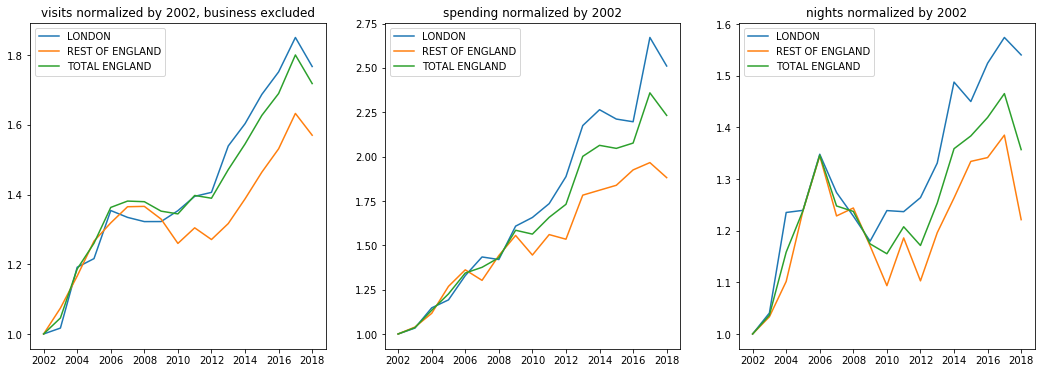

In [120]:
fig, [ax0,ax,ax2] = plt.subplots(1,3,figsize=(18,6))

area = 'LONDON'
index = (uk_visits3['area'] == area)
ax0.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area)

area = 'REST OF ENGLAND'
index = (uk_visits3['area'] == area)
ax0.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area)

# area = 'REST OF UK'
# index = (uk_visits3['area'] == area)
# ax0.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area)

area = 'TOTAL ENGLAND'
index = (uk_visits3['area'] == area)
ax0.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area)

# area = 'ALL STAYING VISITS'
# index = (uk_visits3['area'] == area)
# ax0.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area)

ax0.legend(loc=0) 
ax0.set_title("visits normalized by 2002, business excluded")


area = 'LONDON'
index = (uk_visits3['area'] == area)
ax.plot(uk_visits3[index]['year'],uk_visits3[index]['spend']/uk_visits3[index]['spend'].iloc[0],label=area)

area = 'REST OF ENGLAND'
index = (uk_visits3['area'] == area)
ax.plot(uk_visits3[index]['year'],uk_visits3[index]['spend']/uk_visits3[index]['spend'].iloc[0],label=area)

# area = 'REST OF UK'
# index = (uk_visits3['area'] == area)
# ax.plot(uk_visits3[index]['year'],uk_visits3[index]['spend']/uk_visits3[index]['spend'].iloc[0],label=area)

area = 'TOTAL ENGLAND'
index = (uk_visits3['area'] == area)
ax.plot(uk_visits3[index]['year'],uk_visits3[index]['spend']/uk_visits3[index]['spend'].iloc[0],label=area)

# area = 'ALL STAYING VISITS'
# index = (uk_visits3['area'] == area)
# ax.plot(uk_visits3[index]['year'],uk_visits3[index]['spend']/uk_visits3[index]['spend'].iloc[0],label=area)

ax.legend(loc=0)
ax.set_title("spending normalized by 2002")

area = 'LONDON'
index = (uk_visits3['area'] == area)
ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['nights']/uk_visits3[index]['nights'].iloc[0],label=area)

area = 'REST OF ENGLAND'
index = (uk_visits3['area'] == area)
ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['nights']/uk_visits3[index]['nights'].iloc[0],label=area)

# area = 'REST OF UK'
# index = (uk_visits3['area'] == area)
# ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['nights']/uk_visits3[index]['nights'].iloc[0],label=area)

area = 'TOTAL ENGLAND'
index = (uk_visits3['area'] == area)
ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['nights']/uk_visits3[index]['nights'].iloc[0],label=area)

# area = 'ALL STAYING VISITS'
# index = (uk_visits3['area'] == area)
# ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['nights']/uk_visits3[index]['nights'].iloc[0],label=area)

ax2.legend(loc=0) 
ax2.set_title("nights normalized by 2002")

fig.savefig('England_visits.png', dpi=fig.dpi)

Text(0.5, 1.0, 'visits normalized by 2002')

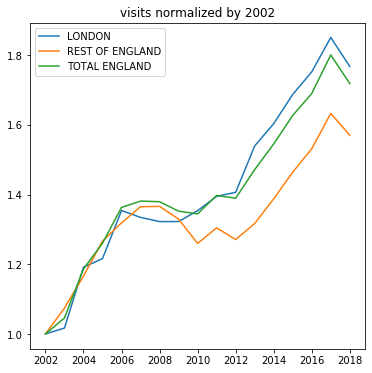

In [121]:
fig,ax2= plt.subplots(figsize=(6,6))

area = 'LONDON'
index = (uk_visits3['area'] == area)
ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area)

area = 'REST OF ENGLAND'
index = (uk_visits3['area'] == area)
ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area)

# area = 'REST OF UK'
# index = (uk_visits3['area'] == area)
# ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area)

area = 'TOTAL ENGLAND'
index = (uk_visits3['area'] == area)
ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area)

# area = 'ALL STAYING VISITS'
# index = (uk_visits3['area'] == area)
# ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area)

ax2.legend(loc=0) 
ax2.set_title("visits normalized by 2002")

In [122]:
temp = uk_visits3[(uk_visits3['area']=='LONDON')&(uk_visits3['purpose']=='Holiday')]

date = np.array('2002-01', dtype=np.datetime64) + 3*np.arange(len(temp))
t = pd.DataFrame({"visits":list(temp["visits"])},index=date)
t2 = seasonal_decompose(t)

plt.plot(t.index,t2.trend)

KeyError: 'purpose'

In [123]:
# [' ISLE OF MAN','ALL STAYING VISITS', 'CENTRAL ENGLAND', "ENGLAND'S NORTH COUNTRY", 'SOUTHERN ENGLAND']

# temp = uk_visits3[uk_visits3["area"] == 'NORTH EAST'].reset_index(drop=True)
# for i in [' CHANNEL ISLANDS',
#        ' OIL RIGS/TRAVELLING',
#        'EAST MIDLANDS', 'EAST OF ENGLAND',
#        'LONDON', 'NORTH WEST', 'SOUTH EAST', 'SOUTH WEST','WEST MIDLANDS', 'YORKSHIRE']:
#     t= uk_visits3[uk_visits3["area"] == i].reset_index(drop=True)
#     if len(t):
#         print(t['area'].iloc[0])
#         temp += t
# #     print(temp.iloc[0])

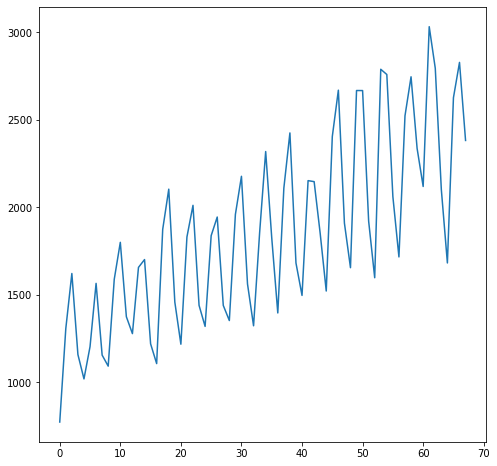

In [124]:
uk_visits3 = uk_visits2.groupby(['year','quarter','purpose','area'])['visits','spend','nights'].agg('sum').reset_index()


fig,ax = plt.subplots(figsize=(8,8))

ax.plot((uk_visits3[(uk_visits3['area']=='LONDON')&(uk_visits3['purpose']=='Holiday')]['year']-2002)*4+uk_visits3[(uk_visits3['area']=='LONDON')&(uk_visits3['purpose']=='Holiday')]['quarter'],\
        uk_visits3[(uk_visits3['area']=='LONDON')&(uk_visits3['purpose']=='Holiday')]['visits'])


In [125]:
UK_inflation = pd.read_csv("data/UK_inflation.csv")
# inflations = UK_inflation[['year','multiplier']].iloc[:30].set_index('year').T.to_dict('list')
# inflations = {i:inflations[i][0] for i in inflations}

inflations = {2018:1}
for i in range(2017,1990,-1):
    inflations[i] = inflations[i+1]*(1+UK_inflation[UK_inflation['year']==i]['inflation'].iloc[0])
inflations[2019] = 1/1.018

In [126]:
london_earnings_by_borough = pd.read_csv("data/london_earnings_by_borough.csv")
london_earnings_by_borough.loc[london_earnings_by_borough["identity"]=='Part-Time',"identity"] = 'Part-time'
london_earnings_by_borough.iloc[20:25]

,year,area_code,area,identity,pay_type,pay,confidence
20,2004,00AB,Barking and Dagenham,Female,Hourly,8.74,6.5
21,2005,00AB,Barking and Dagenham,Female,Hourly,9.43,6.9
22,2006,00AB,Barking and Dagenham,Female,Hourly,9.55,6.6
23,2007,00AB,Barking and Dagenham,Female,Hourly,9.87,9.5
24,2008,00AB,Barking and Dagenham,Female,Hourly,10.62,7.8


In [127]:
# london_infrastructure_spending

In [128]:
london_earnings_by_borough[(london_earnings_by_borough['pay'].isnull())&(london_earnings_by_borough['area_code']!='00AA')]

,year,area_code,area,identity,pay_type,pay,confidence
3738,2014,00AW,Kensington and Chelsea,Male,Hourly,NaN,NaN
3739,2015,00AW,Kensington and Chelsea,Male,Hourly,NaN,NaN
3740,2016,00AW,Kensington and Chelsea,Male,Hourly,NaN,NaN
3743,2019,00AW,Kensington and Chelsea,Male,Hourly,NaN,NaN
4584,2014,00AW,Kensington and Chelsea,Male,Weekly,NaN,NaN
4585,2015,00AW,Kensington and Chelsea,Male,Weekly,NaN,NaN
5405,2007,00AU,Islington,Part-time,Hourly,NaN,NaN
5428,2012,00AW,Kensington and Chelsea,Part-time,Hourly,NaN,NaN
5431,2015,00AW,Kensington and Chelsea,Part-time,Hourly,NaN,NaN
5656,2006,00BK,Westminster,Part-time,Hourly,NaN,NaN


In [129]:
def isnan(val):
    return (~(val<0))&(~(val>=0))

for index in london_earnings_by_borough[london_earnings_by_borough['pay'].isnull()].index:
    year,area_code,_,identity,pay_type,_,_ = list(london_earnings_by_borough.iloc[index])
    
    if (area_code!="00AA"):
        if (year==2002):
            _,_,_,_,_,pay,confidence = list(london_earnings_by_borough[(london_earnings_by_borough['year']==year+1)\
                                   &(london_earnings_by_borough['area_code'] == area_code)\
                                  & (london_earnings_by_borough['identity']==identity)\
                              & (london_earnings_by_borough['pay_type']==pay_type)].iloc[0])      
            london_earnings_by_borough[(london_earnings_by_borough['year']==2002)\
                                   &(london_earnings_by_borough['area_code'] == area_code)\
                                  & (london_earnings_by_borough['identity']==identity)\
                              & (london_earnings_by_borough['pay_type']==pay_type)].fillna({"pay":pay,"confidence":confidence},inplace=True)
        elif year<2019:
            _,_,_,_,_,pay1,confidence1 = np.array(london_earnings_by_borough[(london_earnings_by_borough['year']==year+1)\
                                   &(london_earnings_by_borough['area_code'] == area_code)\
                                  & (london_earnings_by_borough['identity']==identity)\
                              & (london_earnings_by_borough['pay_type']==pay_type)].iloc[0])
            _,_,_,_,_,pay2,confidence2 = np.array(london_earnings_by_borough[(london_earnings_by_borough['year']==year-1)\
                                   &(london_earnings_by_borough['area_code'] == area_code)\
                                  & (london_earnings_by_borough['identity']==identity)\
                              & (london_earnings_by_borough['pay_type']==pay_type)].iloc[0])
            
            if isnan(pay1):
                pay = pay2
            elif isnan(pay2):
                pay = pay1
            else:
                pay = (pay1+pay2)//2
            if confidence1==np.nan:
                confidence = confidence2
            elif confidence2 == np.nan:
                confidence = confidence1
            else:
                confidence = (confidence1+confidence2)//2 
        else:
            _,_,_,_,_,pay,confidence = list(london_earnings_by_borough[(london_earnings_by_borough['year']==year-1)\
                                   &(london_earnings_by_borough['area_code'] == area_code)\
                                  & (london_earnings_by_borough['identity']==identity)\
                              & (london_earnings_by_borough['pay_type']==pay_type)].iloc[0])      
            london_earnings_by_borough[(london_earnings_by_borough['year']==2002)\
                                   &(london_earnings_by_borough['area_code'] == area_code)\
                                  & (london_earnings_by_borough['identity']==identity)\
                              & (london_earnings_by_borough['pay_type']==pay_type)].fillna({"pay":pay,"confidence":confidence},inplace=True)            
        london_earnings_by_borough.iloc[index,-2]=pay
        london_earnings_by_borough.iloc[index,-1]=confidence
        

In [130]:
london_infrastructure_spending = pd.read_csv("data/london_infrastructure_spending.csv",encoding='cp1252')
london_infrastructure_spending.head()

,expense_category,breakdown,baseline_budget,31/12/2011_forecast,31/03/2012_forecast,variance
0,Site Preparation and Infrastructure,Powerlines,282.0,286,287,1.0
1,Site Preparation and Infrastructure,Utilities,256.0,238,235,-3.0
2,Site Preparation and Infrastructure,Enabling Works,364.0,386,386,0.0
3,Site Preparation and Infrastructure,F10 Bridge,89.0,56,55,-1.0
4,Site Preparation and Infrastructure,"Other Structures, Bridges and Highways",740.0,553,565,12.0


In [131]:
areas = london_earnings_by_borough[['area_code','area']].drop_duplicates().reset_index(drop=True)
areas = areas.set_index('area_code').T.to_dict('list')
areas = {i:areas[i][0] for i in areas}

In [132]:
london_underground.head()

NameError: name 'london_underground' is not defined

In [78]:
t = london_economic_activity[['area_code','area']].drop_duplicates().reset_index(drop=True)
# t
t[t['area_code'].map(lambda x:len(x)==1)]

NameError: name 'london_economic_activity' is not defined

In [79]:
areas_regions

NameError: name 'areas_regions' is not defined

In [80]:
areas_boroughs = {i:j for i,j in areas.items() if "00" in i}

areas_regions = {i:j for i,j in areas.items() if len(i)==1}

areas_boroughs_reverse = {j:i for i,j in areas_boroughs.items()}

In [81]:
import colorsys
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())[::2]
sorted_names = np.random.choice([name for hsv, name in by_hsv],50)
RGBs = {i:j for i,j in zip(sorted(areas.keys()),sorted_names[:len(areas)])}

RGBs['00AA'] = 'red'
RGBs['00AW'] = 'blue'

In [84]:
london_economic_activity = pd.read_csv("data/london_economic_activity.csv")
london_economic_activity['year'] = london_economic_activity['year'].apply(lambda x:re.sub("[^0-9]", "",x)[:4])
areas_economic = london_economic_activity[['area_code','area']].drop_duplicates().reset_index(drop=True)
areas_economic = areas_economic.set_index('area_code').T.to_dict('list')
areas_economic = {i:areas_economic[i][0] for i in areas_economic}

london_economic_activity.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  after removing the cwd from sys.path.


,year,area_code,area,gender,economically_active,working_age,percent,confidence
0,2005,00AA,City of London,F,2400.0,3600.0,64.4,NaN
1,2006,00AA,City of London,F,NaN,NaN,NaN,NaN
2,2007,00AA,City of London,F,NaN,1400.0,NaN,NaN
3,2008,00AA,City of London,F,1200.0,1200.0,100.0,NaN
4,2009,00AA,City of London,F,NaN,NaN,NaN,NaN


In [85]:
london_economic_activity[(london_economic_activity['gender']=='F')&(london_economic_activity['area_code'].isin(["H","J","K"]))]

,year,area_code,area,gender,economically_active,working_age,percent,confidence
585,2005,H,South East,F,1942800.0,2628900.0,73.9,0.6
586,2006,H,South East,F,1960700.0,2657800.0,73.8,0.8
587,2007,H,South East,F,1973800.0,2685600.0,73.5,0.8
588,2008,H,South East,F,1995200.0,2704800.0,73.8,0.8
589,2009,H,South East,F,1998700.0,2718700.0,73.5,0.8
590,2010,H,South East,F,2000400.0,2737200.0,73.1,0.8
591,2011,H,South East,F,2006900.0,2748300.0,73.0,0.8
592,2012,H,South East,F,2020200.0,2744500.0,73.6,0.8
593,2013,H,South East,F,1978100.0,2873200.0,68.8,0.9
594,2014,H,South East,F,2005700.0,2899400.0,69.2,0.9


In [86]:
london_sports_participation = pd.read_csv("data/london_sports_participation.csv")
areas_sports = london_sports_participation[['area_code','area']].drop_duplicates().reset_index(drop=True)
areas_sports = areas_sports.set_index('area_code').T.to_dict('list')
areas_sports = {i:areas_sports[i][0] for i in areas_sports}
london_sports_participation.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  This is separate from the ipykernel package so we can avoid doing imports until


,year,area_code,area,sports_participation,percentage,population
0,2005-2006,A,North East,one+,0.329,687000.0
1,2007-2008,A,North East,one+,0.348,730300.0
2,2008-2009,A,North East,one+,0.354,748600.0
3,2009-2010,A,North East,one+,0.358,760100.0
4,2010-2011,A,North East,one+,0.335,719300.0


In [88]:
london_taxpayer_income = pd.read_csv("data/london_taxpayer_income.csv")
london_taxpayer_income['year'] = london_taxpayer_income['year'].apply(lambda x:int(x.split("-")[0]))

areas_taxpayer = london_taxpayer_income[['area_code','area']].drop_duplicates().reset_index(drop=True)
areas_taxpayer = areas_taxpayer.set_index('area_code').T.to_dict('list')
areas_taxpayer = {i:areas_taxpayer[i][0] for i in areas_taxpayer}

london_taxpayer_income = london_taxpayer_income.append(london_taxpayer_income[(london_taxpayer_income['year']>=2007)&(london_taxpayer_income['year']<=2009)].groupby(['area_code','area']).mean().reset_index().\
reindex(columns= ['year','area_code','area','population','mean_income','median_income'])).sort_values(['area_code','year'])
for col in ['year','population','mean_income','median_income']:
    london_taxpayer_income[col] = london_taxpayer_income[col].map(int)

london_taxpayer_income.head()

,year,area_code,area,population,mean_income,median_income
0,1999,00AA,City of London,10000,109800,40400
1,2000,00AA,City of London,10000,137000,65000
2,2001,00AA,City of London,12000,92900,38300
3,2002,00AA,City of London,11000,78700,37000
4,2003,00AA,City of London,10000,85800,39200


In [89]:
london_taxpayer = pd.concat([london_taxpayer_income.iloc[:,:-2],\
                             london_taxpayer_income.iloc[:,-2:].multiply(london_taxpayer_income['year'].map(inflations),axis=0)],\
                            axis=1)

In [90]:
temp = pd.pivot_table(london_earnings_by_borough, values='pay', index=['year', 'area_code'],
                    columns=['identity','pay_type']).reset_index()
temp.columns = ['_'.join(col) for col in temp.columns]
temp.rename(columns={"year_": "year", "area_code_": "area_code"},inplace=True)
temp = temp[(temp.year<=2017)&(temp['year']>=2002)]

temp2 = london_taxpayer_income[(london_taxpayer_income['year']<=2017)&(london_taxpayer_income['year']>=2002)]

london_earnings = temp.merge(temp2[['year','area_code','population','mean_income','median_income']],on=['year','area_code'])

columns = list(london_earnings.columns)
columns.pop(columns.index("population"))
columns+=['population']

london_earnings = london_earnings.reindex(columns= columns)

london_earnings = pd.concat([london_earnings.iloc[:,:2],pd.concat([london_earnings.iloc[:,2:-1].multiply(london_earnings['year'].map(inflations),axis=0),london_earnings.iloc[:,-1]],axis=1)],axis=1)


In [91]:
london_city = london_earnings[london_earnings['area_code']=='H'].reset_index(drop=True)

In [92]:
london_earnings_normalized = pd.DataFrame()
for area_code in london_earnings['area_code'].unique():
    temp = london_earnings[london_earnings['area_code'] == area_code].reset_index(drop=True)
    temp = pd.concat([temp.iloc[:,:2],temp.iloc[:,2:].divide(temp.iloc[0,2:])],axis=1)
    london_earnings_normalized = london_earnings_normalized.append(temp)       

Ealing


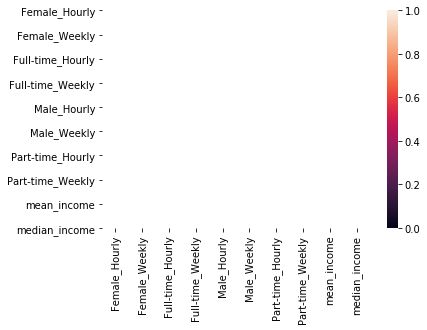

In [93]:
code = "00AJ"
print(areas[code])
temp2 = temp[temp['area_code']==code].reset_index(drop=True)
columns = list(temp2.columns)
columns.pop(columns.index("population"))
columns+=['population']
temp2 = temp2.reindex(columns= columns)
# temp2.head()
temp2 = pd.concat([temp2.iloc[:,2:-1].multiply(temp2['year'].map(inflations),axis=0),temp2.iloc[:,-1]],axis=1)

sns.heatmap((temp2.iloc[:,:-1]).corr(),vmin=0,vmax=1)

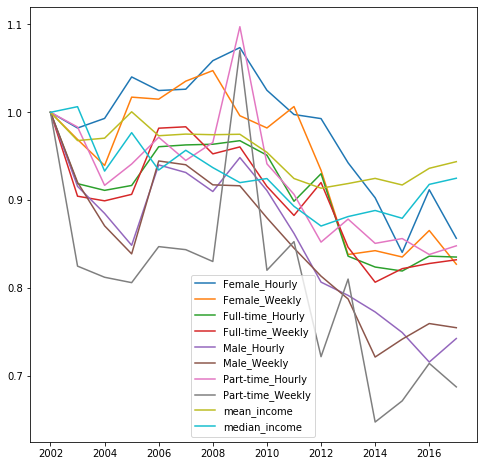

In [94]:
fig,ax = plt.subplots(figsize=(8,8))
for identity in london_earnings_normalized.columns[2:-1]:
    ax.plot(london_earnings_normalized[london_earnings_normalized['area_code']=='00AB']['year'],\
            london_earnings_normalized[london_earnings_normalized['area_code']=='00AB'][identity],label=identity)
ax.legend(loc=0)

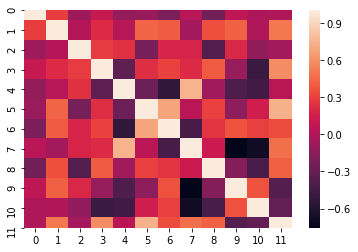

In [95]:
sns.heatmap(pd.DataFrame(np.random.randn(10, 12)).corr())

In [96]:
import collections
counts = collections.Counter()

In [97]:
counts.most_common(10)

[]

In [98]:
for year in london_taxpayer_income['year'].drop_duplicates():
    index = (london_taxpayer_income['year']==year) & (london_taxpayer_income['area_code'].isin(areas_boroughs))
    for i in list(london_taxpayer_income[index].sort_values('median_income')['area'][13:19]):
        counts[i] = counts[i]+1

control_four = [areas_boroughs_reverse[i[0]] for i in counts.most_common(4)]

In [99]:
control_four

['00BC', '00BF', '00AQ', '00AH']

In [100]:
# find the lowest three and highest three boroughs
low = dict()
high = dict()
for year in london_taxpayer_income['year'].drop_duplicates():
    index = (london_taxpayer_income['year']==year) & (london_taxpayer_income['area_code'].isin(areas_boroughs))
    low[year] = list(london_taxpayer_income[index].sort_values('median_income')['area_code'].iloc[:6])
    high[year] = list(london_taxpayer_income[index].sort_values('median_income', ascending=False)['area_code'].iloc[:6])
    
low = pd.Series(low).reset_index()
low.columns = ['year','name']
low = pd.DataFrame(low['name'].tolist(), index= low['year']).reset_index()
low.columns = ['year','low1st','low2nd','low3rd','low4th','low5th',"low6th"]

high = pd.Series(high).reset_index()
high.columns = ['year','name']
high = pd.DataFrame(high['name'].tolist(), index= high['year']).reset_index()
high.columns = ['year','high1st','high2nd','high3rd','high4th','high5th',"high6th"]

df_income = pd.merge(low,high,on='year')

poor_four = df_income.iloc[:,1:7].apply(pd.value_counts).sum(axis=1).sort_values(ascending=False)[:4].index.tolist()

rich_four = df_income.iloc[:,7:13].apply(pd.value_counts).sum(axis=1).sort_values(ascending=False)[:5].index.tolist()

rich_four.remove("00AA")

df_income

,year,low1st,low2nd,low3rd,low4th,low5th,low6th,high1st,high2nd,high3rd,high4th,high5th,high6th
0,1999,00BB,00BG,00AM,00BE,00AR,00AZ,00AA,00BD,00AX,00AG,00AN,00AU
1,2000,00BB,00BH,00AZ,00AY,00BE,00AB,00AA,00AW,00BK,00BD,00BJ,00AG
2,2001,00BB,00AB,00AE,00AT,00BH,00BE,00AA,00AW,00BD,00BK,00BJ,00AN
3,2002,00BB,00AE,00AB,00AL,00AP,00BH,00AA,00AW,00BD,00BK,00BJ,00AG
4,2003,00BB,00AE,00BH,00AZ,00AM,00AB,00AA,00BD,00AW,00BK,00BJ,00AU
5,2004,00BB,00AE,00AB,00BH,00AK,00AL,00AA,00BD,00AG,00BK,00AW,00BJ
6,2005,00BB,00AE,00BH,00AB,00AL,00AP,00AA,00AW,00BK,00BD,00BJ,00AG
7,2006,00BB,00AB,00BH,00AE,00AM,00AP,00AA,00AW,00BD,00BK,00AG,00BJ
8,2007,00BB,00BH,00AE,00AB,00AD,00AP,00AA,00AW,00BK,00BD,00AG,00BJ
9,2008,00BB,00AE,00AB,00BH,00AP,00AD,00AA,00AW,00BK,00BD,00AG,00BJ


In [101]:
df_income.iloc[:,7:13].apply(pd.value_counts).sum(axis=1).sort_values(ascending=False)

00BD    19.0
00AA    19.0
00BK    18.0
00BJ    18.0
00AW    18.0
00AG    17.0
00AU     2.0
00AN     2.0
00AX     1.0
dtype: float64

In [102]:
len(sorted_names)

50

Text(0.5, 1.0, 'median income for different area, inflation adjusted')

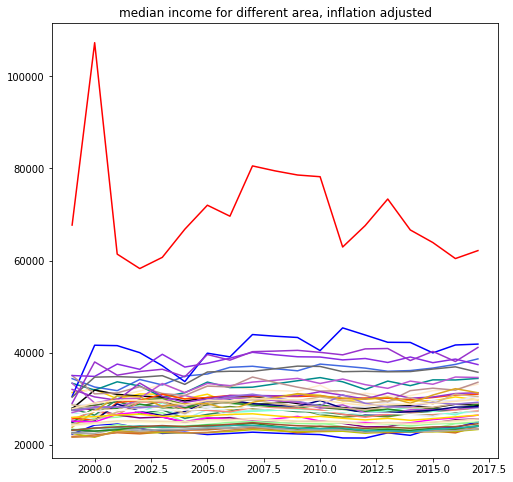

In [103]:
fig,ax = plt.subplots(figsize=(8,8))
for code in london_taxpayer_income['area_code'].unique():
    index = (london_taxpayer_income['area_code']==code)
    ax.plot(london_taxpayer_income[index]['year'],london_taxpayer_income[index]['median_income']*london_taxpayer_income[index]['year'].map(inflations),color=RGBs[code])
    
ax.set_title("median income for different area, inflation adjusted")    

Text(0.5, 1.0, 'median income for different area, inflation adjusted')

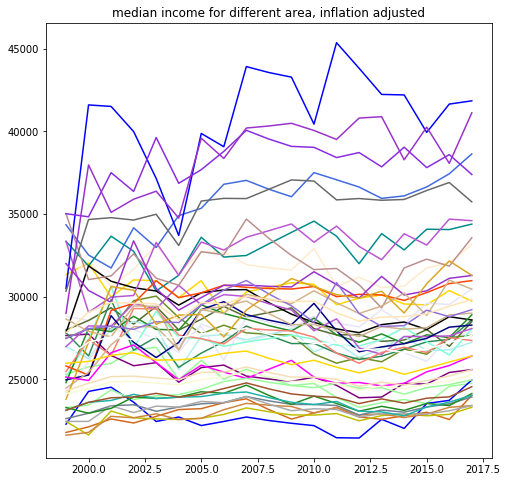

In [104]:
fig,ax = plt.subplots(figsize=(8,8))
for code in london_taxpayer['area_code'].unique():
    if code!='00AA':
        index = (london_taxpayer['area_code']==code)
        ax.plot(london_taxpayer[index]['year'],london_taxpayer[index]['median_income'],color=RGBs[code])
    
ax.set_title("median income for different area, inflation adjusted") 

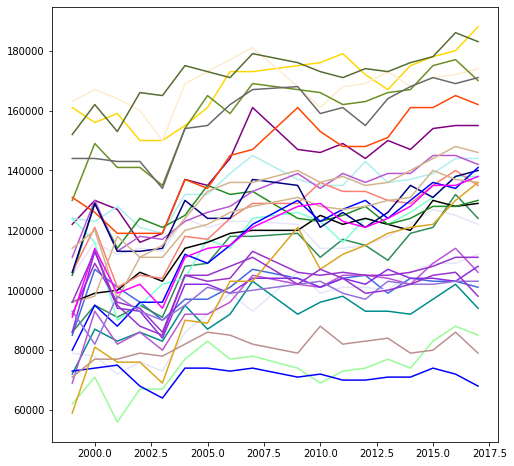

In [105]:
fig,ax = plt.subplots(figsize=(8,8))
for code in areas_boroughs:
    if code!='00AA':
        index = (london_taxpayer_income['area_code']==code)
        ax.plot(london_taxpayer_income[index]['year'],london_taxpayer_income[index]['population'],color=RGBs[code])

In [106]:
london_underground.head()

NameError: name 'london_underground' is not defined

In [107]:
london_infrastructure_spending.head()

,expense_category,breakdown,baseline_budget,31/12/2011_forecast,31/03/2012_forecast,variance
0,Site Preparation and Infrastructure,Powerlines,282.0,286,287,1.0
1,Site Preparation and Infrastructure,Utilities,256.0,238,235,-3.0
2,Site Preparation and Infrastructure,Enabling Works,364.0,386,386,0.0
3,Site Preparation and Infrastructure,F10 Bridge,89.0,56,55,-1.0
4,Site Preparation and Infrastructure,"Other Structures, Bridges and Highways",740.0,553,565,12.0


# london_tickets_for_sale, london_ticket_sales

In [ ]:
london_tickets_for_sale = pd.read_csv("data/london_tickets_for_sale.csv",encoding='cp1252')
london_tickets_for_sale.head()

In [ ]:
london_ticket_sales = pd.read_csv("data/london_ticket_sales.csv")
london_ticket_sales.head()

In [ ]:
london_tickets_for_sale = london_tickets_for_sale[~(london_tickets_for_sale['code']=='–')]

temp = london_tickets_for_sale[['code','venue']].drop_duplicates().reset_index(drop=True)
temp = temp.set_index('code').T.to_dict('list')

venues = dict()
for i,j in temp.items():
    if "Olympic" in j[0]:
        venues[i] = "Olympic Park"
    elif "Wimbledon" in j[0]:
        venues[i] = "Wimbledon"
    elif "Royal" in j[0]:
        venues[i] = "Royal Artillery Barracks"
    else:
        venues[i] = j[0]
        
for i in set(london_ticket_sales['session'].unique()) - set(london_tickets_for_sale['code'].unique()):
    if 'CR' in i:
        venues[i] = 'The Mall'
    elif 'PAT' in i:
        venues[i] = 'Olympic Park'
        
        
london_ticket_sales['venue'] = london_ticket_sales['session'].map(venues) 

venues_location = {"Olympic Park":"Newham",\
                   "ExCeL":"Newham",\
                   "North Greenwich Arena":'Greenwich',\
                   "The Mall":"Westminster"\
                  ,"Wembley Arena":"Brent",\
                   "Hyde Park":"Westminster"}

london_ticket_sales['area'] = london_ticket_sales['venue'].map(venues_location)



london_ticket_sales.loc[london_ticket_sales['price']=='Special','price'] = 10
london_ticket_sales['price'] = london_ticket_sales['price'].map(int)
london_ticket_sales['number_sold'] = london_ticket_sales['number_sold'].map(int)


london_ticket_sales['revenue'] = london_ticket_sales['price']*london_ticket_sales['number_sold']/london_ticket_sales['percent_sold_to_public']

london_ticket = london_ticket_sales.groupby('area')['revenue'].agg('sum').reset_index()

In [ ]:
london_ticket_sales[london_ticket_sales['session']=="FB002"]

In [ ]:
london_tickets_for_sale[london_tickets_for_sale['venue']=="City of Coventry Stadium; Coventry"]

In [ ]:
london_ticket

In [ ]:
set(venues.values())

In [ ]:
# london_infrastructure_spending

# taxpayer, df_income

In [ ]:

fig,ax = plt.subplots(figsize=(8,8))
# index = (london_taxpayer_income['area_code']=='H')
# base = london_taxpayer_income[(london_taxpayer_income['year']==2005)&index]['median_income']
# ax.plot(london_taxpayer_income[index]['year'],london_taxpayer_income[index]['median_income']/list(base)[0],color=RGBs['H'],lw=5)


for code in list(df_income.loc[17][1:]):
    index = (london_taxpayer_income['area_code']==code)
#     base = london_taxpayer_income[(london_taxpayer_income['year']==2005)&index]['median_income']
    base = london_taxpayer_income[index]['median_income']*london_taxpayer_income[index]['year'].map(inflations)
    ax.plot(london_taxpayer_income[index]['year'],base/base.iloc[6],color=RGBs[code],label=code)
ax.legend(loc=0)
# ax.set_xlim(2005,2018)
ax.set_title('london_taxpayer_income')

In [ ]:
uk_visits.head()

# london_underground_activity

In [ ]:
london_underground_activity= pd.read_csv("data/london_underground_activity.csv")

london_underground_activity.loc[london_underground_activity['area']=='Richmond','area']='Richmond upon Thames'
london_underground_activity.loc[london_underground_activity['area']=='City of Westminster','area']='Westminster'

london_underground_activity = london_underground_activity[~london_underground_activity['area'].isnull()].reset_index(drop=True)

london_underground_station_info = pd.read_csv("data/london_underground_station_info.csv")
london_underground_station_info.loc[london_underground_station_info['local_authority']=='Richmond','local_authority']='Richmond upon Thames'
london_underground_station_info.loc[london_underground_station_info['local_authority']=='City of Westminster','local_authority']='Westminster'

london_underground = london_underground_activity.groupby(['year','area'])['weekday_entry', 'weekday_exit',
       'saturday_entry', 'saturday_exit', 'sunday_entry', 'sunday_exit',
       'annual_entry_and_exit'].agg('sum').reset_index()

london_underground['weekend'] = (london_underground['saturday_entry']+london_underground['saturday_exit']+london_underground['sunday_entry']+london_underground['sunday_exit'])/2
london_underground['weekday'] = london_underground['weekday_entry']+london_underground['weekday_exit']

london_underground = london_underground[london_underground['area'].isin(areas_boroughs_reverse)]

london_underground['area_code'] = london_underground['area'].map(areas_boroughs_reverse)

In [ ]:
london_underground.head()

In [ ]:
london_underground[london_underground['annual_entry_and_exit']==london_underground['annual_entry_and_exit'].max()]

In [ ]:
index = (london_underground['area']=='Newham')
plt.figure(figsize=(6,6))
plt.plot(london_underground[index]['year'],london_underground[index]['weekend']/london_underground[index]['weekend'].iloc[0],label='Newham weekend')
plt.plot(london_underground[index]['year'],london_underground[index]['weekday']/london_underground[index]['weekday'].iloc[0],label='Newham weekday')

t = "Richmond upon Thames"
index = (london_underground['area']==t)
plt.plot(london_underground[index]['year'],london_underground[index]['weekend']/london_underground[index]['weekend'].iloc[0],label=t+' weekend')
plt.plot(london_underground[index]['year'],london_underground[index]['weekday']/london_underground[index]['weekday'].iloc[0],label=t+' weekday')

t = "Westminster"
index = (london_underground['area']==t)
plt.plot(london_underground[index]['year'],london_underground[index]['weekend']/london_underground[index]['weekend'].iloc[0],label=t+' weekend')
plt.plot(london_underground[index]['year'],london_underground[index]['weekday']/london_underground[index]['weekday'].iloc[0],label=t+' weekday')


plt.legend(loc=0)

# london_earnings_by_borough

In [ ]:
# 针对不同类型的人的工资，将不同地区的求平均
df = london_earnings_by_borough.groupby(['year','identity','pay_type']).agg('median').reset_index()

fig,ax = plt.subplots(figsize=(8,8))
ax.set_xticks(range(2002,2020,2))

for identity in ['Full-time','Part-time','Male','Female']:
    for pay_type in ['Hourly','Weekly']:
        index = (df['pay_type']==pay_type) & (df['identity']==identity)
        ax.plot(df[index]['year'],\
                df[index]['pay']*df[index]['year'].map(inflations)/(df[index]['pay']*df[index]['year'].map(inflations)).iloc[0]\
                ,label="%s,%s"%(identity,pay_type))
ax.legend(loc=0)


In [ ]:
london_tickets_for_sale.head()

In [ ]:
t = london_ticket_sales[["price","number_sold"]].groupby("price")['number_sold'].sum().reset_index()
plt.figure(figsize=(7,7))
plt.bar(t['price'],t['number_sold'],width=2)

In [ ]:
london_earnings_normalized.columns

In [ ]:
df.head()

In [ ]:
df = london_earnings_normalized[london_earnings_normalized['area_code'].isin(areas_boroughs)].groupby(['year'])['Female_Hourly', 'Female_Weekly',
       'Full-time_Hourly', 'Full-time_Weekly', 'Male_Hourly', 'Male_Weekly',
       'Part-time_Hourly', 'Part-time_Weekly', 'mean_income', 'median_income',
       'population'].agg('median').reset_index()

fig,ax = plt.subplots(figsize=(8,8))
ax.set_xticks(range(2002,2020,2))

for identity in london_earnings_normalized.columns[2:-1]:
    ax.plot(df['year'],df[identity],label=identity)
ax.legend(loc=0)

ax.set_title("earnings,median of all boroughs")

In [ ]:
# df = london_taxpayer_income.groupby(['year']).median().reset_index()
# df = df[df['year']>=2002]

# fig,ax = plt.subplots(figsize=(8,8))
# ax.set_xticks(range(2002,2020,2))

# for identity in df.columns[-2:]:
#     ax.plot(df['year'],df[identity]*df['year'].map(inflations)/(df[identity]*df['year'].map(inflations)).iloc[0],label=identity)
# ax.legend(loc=0)

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
pay_type = "Hourly"
identity = "Full-time"
for area_code in rich_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

for area_code in poor_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

ax.legend(loc=0)
ax.axvline(2012.5,color='k')

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
pay_type = "Weekly"
identity = "Full-time"
for area_code in rich_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

for area_code in poor_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

ax.legend(loc=0)
ax.axvline(2012.5,color='k')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
london_earnings_normalized[london_earnings_normalized["area_code"]==code][identity+"_"+pay_type]

In [ ]:
pay_type = "Weekly"
identity = "Full-time"

date = np.array('2002', dtype=np.datetime64) + np.arange(len(london_earnings_normalized[london_earnings_normalized["area_code"]==code][identity+"_"+pay_type]))
t = pd.DataFrame({identity+"_"+pay_type:list(london_earnings_normalized[london_earnings_normalized["area_code"]==code][identity+"_"+pay_type])},index=date)
t2 = seasonal_decompose(t)

In [ ]:
uk_visits.head()

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
pay_type = "Weekly"
identity = "Part-time"
for area_code in rich_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

for area_code in poor_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

ax.legend(loc=0)
ax.axvline(2012.5,color='k')


In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
pay_type = "Hourly"
identity = "Part-time"
for area_code in rich_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

for area_code in poor_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

ax.legend(loc=0)
ax.axvline(2012.5,color='k')

In [ ]:
# 不同地区的median_income
temp = london_taxpayer_income.groupby(["area_code","area"])['median_income'].median().reset_index().sort_values("median_income",ascending=False).reset_index(drop=True)

plt.figure(figsize=(7,7))
for area_code in rich_four:
    plt.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'].iloc[3:],london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'].iloc[3:]/(london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'].iloc[3]),label=areas[area_code])

    
# for area_code in temp[temp["area_code"].apply(lambda x:len(x)==4)].iloc[-5:,0]:
for area_code in poor_four:
    plt.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'].iloc[3:],london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'].iloc[3:]/(london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'].iloc[3]),label=areas[area_code])

    
# for area_code in areas_regions:
#     plt.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'].iloc[3:],london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'].iloc[3:]/(london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'].iloc[3]),label=areas[area_code])
    
plt.legend(loc=0)
plt.axvline(2012)

plt.title("median income")

In [ ]:
set(areas_boroughs) - set(rich_four)-set(poor_four)

In [ ]:
plt.figure(figsize=(8,8))
for area_code in set(areas_boroughs) - set(rich_four)-set(poor_four)-{"00AA"}:
    plt.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])

plt.title("not rich, not poor")

In [ ]:
plt.figure(figsize=(8,8))
for area_code in areas_regions:
    plt.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])

plt.legend(loc=0)
plt.title("9 regions in England")

In [ ]:
plt.figure(figsize=(8,8))
for area_code in areas_regions:
    plt.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'].iloc[3:],np.log10(london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'].iloc[3:]),label=areas[area_code])

plt.legend(loc=0)
plt.title("9 regions in England")

In [ ]:
# median_income
temp = london_taxpayer_income.groupby(["area_code","area"])['median_income'].median().reset_index().sort_values("median_income",ascending=False).reset_index(drop=True)

plt.figure(figsize=(14,7))
# for area_code in rich_four:
#     plt.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])

    
# for area_code in temp[temp["area_code"].apply(lambda x:len(x)==4)].iloc[-5:,0]:
for area_code in poor_four:
    plt.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code],alpha=0.5)

    
for area_code in control_four:
    plt.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])
    
plt.legend(loc=0)
plt.axvline(2005.5)

plt.axvline(2010.5)

plt.axvline(2014.5)

plt.title("median income")

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

temp = london_taxpayer_income.groupby(["area_code","area"])['median_income'].median().reset_index().sort_values("median_income",ascending=False).reset_index(drop=True)


for code in temp.iloc[1:6,0]:
    if code!='00AA':
        ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==code]["median_income"])   
    
for code in temp[temp["area_code"].apply(lambda x:len(x)==4)].iloc[-5:,0]:
    if code!='00AA':
        ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==code]["median_income"])   
        
    

In [ ]:
london_earnings_normalized['population'].max()

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
pay_type = "Weekly"
identity = "Full-time"
# for code in areas_boroughs:
#     if code!='00AA':
#         ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==code]['population'])   

for area_code in rich_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['population'],label=areas[area_code])

for area_code in poor_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['population'],label=areas[area_code])

ax.legend(loc=0)
ax.axvline(2012.5,color='k')
        
ax.set_title('population')    

In [ ]:
london_taxpayer.iloc[-1]

In [ ]:
london_taxpayer_normalized.head()

In [ ]:
london_taxpayer_normalized = pd.DataFrame()

for area_code in london_taxpayer['area_code'].unique():
    temp = london_taxpayer[london_taxpayer['area_code'] == area_code].reset_index(drop=True)
    temp = pd.concat([temp.iloc[:,:-2],temp.iloc[:,-2:].divide(temp.iloc[3,-2:])],axis=1)
    london_taxpayer_normalized = london_taxpayer_normalized.append(temp)     
    
#     temp = london_taxpayer[london_taxpayer['area_code'] == area_code].reset_index(drop=True)
#     temp = pd.concat([temp.iloc[:,:-2],london_taxpayer[london_taxpayer['area_code'] == area_code].reset_index(drop=True).iloc[:,-2:].div\
# (london_taxpayer[london_taxpayer['area_code'] == area_code].reset_index(drop=True).iloc[:,-2:].shift(1))],axis=1)
#     london_taxpayer_normalized = london_taxpayer_normalized.append(temp.iloc[1:]) 
    
london_taxpayer_normalized = london_taxpayer_normalized[london_taxpayer_normalized['area']!='City of London'].reset_index(drop=True)

In [ ]:
london_taxpayer_normalized.head()

In [ ]:
X_arr = []
y_arr = []
for area in control_four:
    for year in range(2002,2018):
        temp = [1]+[0]*7
        if year_bin[year]:
            temp[year_bin[year]+1] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer[london_taxpayer['area'] == area]['median_income'].tolist()[3:]

X_arr = np.array(X_arr)
y_arr = np.array(y_arr)

In [ ]:
X_arr = []
y_arr = []
for area in control_four:
    for year in range(2002,2018):
        temp = [1]+[0]*(1+1+3+3+3)
        if year_bin[year]:
            temp[year_bin[year]+1] = 1
        X_arr.append(temp)
    y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]
    
print(len(y_arr))
for area in poor_four:
    for year in range(2002,2018):
        temp = [1]+[0]*(1+1+3+3+3)
        if year_bin[year]:
            temp[year_bin[year]+1] = 1
            temp[year_bin[year]+] = 1
        X_arr.append(temp)
    y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]
    
for area in rich_four:
    for year in range(2002,2018):
        temp = [1]+[0]*(1+1+3+3+3)
        if year_bin[year]:
            temp[year_bin[year]+1] = 1
            temp[year_bin[year]+6] = 1
        X_arr.append(temp)
    y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]    
    

X_arr = np.array(X_arr)
y_arr = np.array(y_arr)

In [ ]:
year_bin = dict()
for year in range(2002,2006):
    year_bin[year] = 0
for year in range(2006,2011):
    year_bin[year] = 1
for year in range(2011,2015):
    year_bin[year] = 2
for year in range(2015,2018):
    year_bin[year] = 3

In [ ]:
X_arr = []
y_arr = []
m,n = 2,3#3组4期
for area in set(areas_regions)-{"H"}:
    for year in range(2002,2018):
        temp = [1]+[0]*(m+3*n)
        if year_bin[year]:
            temp[year_bin[year]+1] = 1
        X_arr.append(temp)
#     y_arr+=london_taxpayer[london_taxpayer['area_code'] == area]['median_income'].tolist()[3:]
    y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]

print(len(X_arr),len(y_arr))
for area in ["H"]:
    for year in range(2002,2018):
        temp = [1]+[0]*(m+3*n)
        temp[1] = 1
        if year_bin[year]:
            temp[year_bin[year]+m] = 1
            temp[year_bin[year]+m+3] = 1
        X_arr.append(temp)
#     y_arr+=london_taxpayer[london_taxpayer['area_code'] == area]['median_income'].tolist()[3:]
    y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]

for area in rich_four:
    for year in range(2002,2018):
        temp = [1]+[0]*(1+1+3+3+3)
        temp[2] = 1
        if year_bin[year]:
            temp[year_bin[year]+2] = 1
            temp[year_bin[year]+2+6] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer[london_taxpayer['area_code'] == area]['median_income'].tolist()[3:]
#     y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]
    

X_arr = np.array(X_arr)
y_arr = np.array(y_arr)

X_arr = pd.DataFrame(X_arr)
y_arr = pd.DataFrame(y_arr)

print(len(areas_regions)+len(poor_four)+len(rich_four))
print(X_arr.shape,y_arr.shape)
# X_arr.iloc[64:128].head(10)

In [ ]:
year_bin = dict()
for year in range(2002,2006):
    year_bin[year] = 0
for year in range(2006,2011):
    year_bin[year] = 1
for year in range(2011,2015):
    year_bin[year] = 2
for year in range(2015,2018):
    year_bin[year] = 3
    
# for year in range(2002,2018):
#     year_bin[year] = year-2002

In [ ]:
control_four

In [ ]:
[areas[i] for i in control_four]

In [ ]:
X_arr = []
y_arr = []
m,n = 2,3#3组4期
for area in ['00BF','00AH']:
    for year in range(2002,2018):
        temp = [1]+[0]*(m+3*n)
        if year_bin[year]:
            temp[year_bin[year]+1] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income'].tolist()[3:]
#     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]
    
for area in poor_four:
    for year in range(2002,2018):
        temp = [1]+[0]*(m+3*n)
        temp[1] = 1
        if year_bin[year]:
            temp[year_bin[year]+m] = 1
            temp[year_bin[year]+m+n] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income'].tolist()[3:]
#     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]

for area in rich_four:
    for year in range(2002,2018):
        temp = [1]+[0]*(m+3*n)
        temp[2] = 1
        if year_bin[year]:
            temp[year_bin[year]+m] = 1
            temp[year_bin[year]+m+2*n] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income'].tolist()[3:]
#     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]
    

X_arr = np.array(X_arr)
y_arr = np.array(y_arr)

X_arr = pd.DataFrame(X_arr)
y_arr = pd.DataFrame(y_arr)

print(len(areas_regions)+len(poor_four)+len(rich_four))
print(X_arr.shape,y_arr.shape)
# X_arr.iloc[64:128].head(10)

In [ ]:
lr = LR()
lr.fit(X_arr,y_arr)

In [ ]:
clr = Ridge()
clr.fit(X_arr,y_arr)

In [ ]:
lr.coef_.shape

In [ ]:
lr.coef_

In [ ]:
clr.coef_

In [ ]:
est = sm.OLS(y_arr, X_arr)
est2 = est.fit()

In [ ]:
print(est2.summary())

In [ ]:
london_tickets_for_sale.head()

In [ ]:
london_ticket_sales.head()

In [ ]:
lr.score(X_arr,y_arr),clr.score(X_arr,y_arr)

In [ ]:
lr.coef_

In [ ]:
clr.coef_

In [ ]:
clr = Ridge()
clr.fit(X_arr,y_arr)

In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
[areas[i] for i in poor_four],[areas[i] for i in rich_four]

In [ ]:
X_arr.shape,y_arr.shape

In [ ]:
london_taxpayer[london_taxpayer['area'] == area]['median_income'].tolist()[3:]

In [ ]:
[areas[i] for i in control_four]

In [ ]:
from PIL import Image

img = Image.open("/Users/myzone/Downloads/london-boroughs-map.jpg")   # 读取图片
img = img.convert("L")   # 转化为黑白图片
img.save("/Users/myzone/Downloads/london-boroughs-map444.jpg")

In [ ]:
img

In [ ]:
df_income

In [ ]:
areas_boroughs_reverse['Bromley']

In [ ]:
set(areas_boroughs)-set(london_underground['area_code'].unique())

In [ ]:
counts.most_common(10)

In [ ]:
[areas_boroughs[i] for i in set(areas_boroughs)-set(london_underground['area_code'].unique())]

In [ ]:
[areas_boroughs[i] for i in control_four]

In [ ]:
[areas_boroughs[i] for i in rich_four]

In [ ]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge

In [ ]:
clr.coef_